In [15]:
import numpy as np
import matplotlib.pyplot as plt 

In [16]:
A40 = 1.4449829796902633
A84 = 1.002531249672566

A80 = 2.4475142293628296

#A40 = 1.95
#A84 = 2.44 - 1.95

A40_unc = 0.0028
A80_unc = 0.0028
A84_unc = np.sqrt(A40_unc**2 + A80_unc**2)

In [17]:
n_values = np.linspace(0.2, 1.2, 256)  
sr_values = np.linspace(0, 1, 256)

In [18]:
PTE0 = 0.00135989
PTE4 = np.flip(np.loadtxt('../../../Sweep-Txt-Files/Nick_PTE4_Short_2DSweep.txt'))
PTE8 = np.flip(np.loadtxt('../../../Sweep-Txt-Files/matrix_8_short_n_0.2-1.2_sr_0-1.txt'))

PTE0_unc = 0.0000037
PTE4_unc = np.sqrt(PTE4/2_000_000)
PTE8_unc = np.sqrt(PTE8/2_000_000)


In [19]:
def Score (Type, n_values, sr_values, PTE0, PTE4, PTE8, A40, A84, PTE0_unc, PTE4_unc, 
           PTE8_unc, A40_unc, A84_unc, Plot):
    a = PTE4/PTE0 - 1 - A40
    b =( PTE8-PTE4)/PTE0 - A84
    
    if Type == 1:
        score = -((a)**(2)+ (b)**(2))
        score_unc = np.sqrt((2/PTE0 * (a-b) * PTE4_unc)**2 
                            + (2/PTE0 * b * PTE8_unc)**2 
                            + (2 * a * A40_unc)**2 +(2 * b * A84_unc)**2 
                            + (4/PTE0 * (a-b) * b * np.cov(PTE4, PTE8)[0,1]))
        
    if Type == 2:
        sgn_a = np.sign(a)
        sgn_b = np.sign(b)
        
        score = -(np.abs(a)**(1/2) + np.abs(b)**(1/2))
        score_unc = np.sqrt( ((sgn_a/np.sqrt(np.abs(a)) - sgn_b/np.sqrt(np.abs(b)))/(2*PTE0) * PTE4_unc)**2 
                            + (sgn_b/(2*np.sqrt(np.abs(b))) * PTE8_unc)**2 
                            + (-sgn_a/(2*np.sqrt(np.abs(a))) * A40_unc)**2
                            + (-sgn_b/(2*np.sqrt(np.abs(b))) * A84_unc)**2
                            + 2 * (sgn_a/np.sqrt(np.abs(a)) - sgn_b/np.sqrt(np.abs(b)))/(2*PTE0) * sgn_b/(2*np.sqrt(np.abs(b))) * np.cov(PTE4, PTE8)[0,1] )
    
    if Plot:
        plt.figure(figsize=(8, 6))
        plt.imshow(score, cmap = 'inferno', origin="lower",
                   extent=[n_values.min(), n_values.max(), sr_values.min(), 
                           sr_values.max()])

        plt.colorbar(label="Intensity")
        plt.xlabel("Real Part of the Refractive Index (n)")
        plt.ylabel("Specular Ratio")
        plt.title("Thermal Map of Data")
    
        plt.show()
    
    return [score, score_unc, a, b]

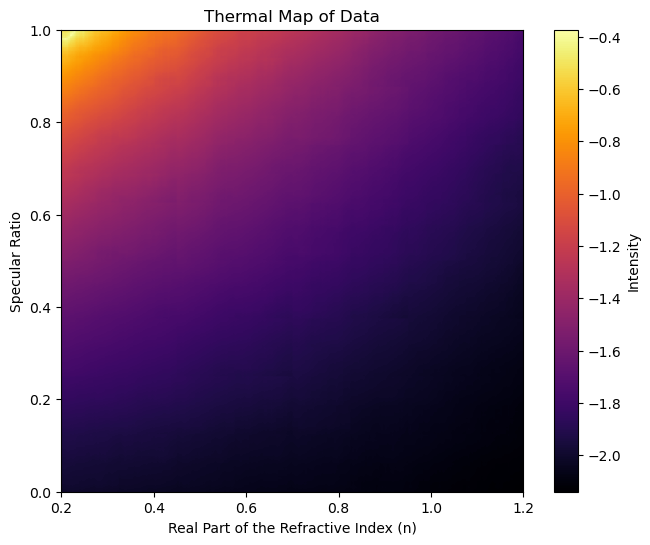

[[0.00279608 0.00283694 0.00284099 ... 0.00263461 0.00261511 0.00260366]
 [0.00282219 0.00285811 0.00286611 ... 0.00265717 0.0026368  0.00262001]
 [0.00281694 0.00285675 0.00285628 ... 0.00264689 0.00262706 0.00260737]
 ...
 [0.16332652 0.16496119 0.15800751 ... 0.00291858 0.00288409 0.00287382]
 [0.1404375  0.14144194 0.13893061 ... 0.00295433 0.00291771 0.0029101 ]
 [0.1363076  0.13657732 0.13513519 ... 0.00294033 0.0029063  0.00290412]]


In [20]:
score, Score_unc, a, b = Score(2, n_values, sr_values, PTE0, PTE4, PTE8, A40, A84, PTE0_unc, PTE4_unc, 
                       PTE8_unc, A40_unc, A84_unc, True)

print(Score_unc)